In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# The path to your Excel file
file_path = 'P:/LAB/Manuel/2023/2023-11/HBB/20231128_HBB/AllSamples/AllSamples.xlsx'

try:
    df = pd.read_excel(file_path) # you might need to specify the engine='openpyxl' in case it's an '.xlsx' file and you have both 'openpyxl' and 'xlrd' installed.
except Exception as e:
    print(e)

# Display the first few rows of the DataFrame
print(df.head())

         Sample  Number  Length rod  Length hook  Length total
0  DflhE DflgHI       1      14.860       53.291        68.138
1  DflhE DflgHI       2      14.422       57.364        71.030
2  DflhE DflgHI       3      17.650       53.278        72.228
3  DflhE DflgHI       4      15.409       65.133        80.325
4  DflhE DflgHI       5      14.351       54.288        69.329


In [12]:
print(df.tail())

    Sample  Number  Length rod  Length hook  Length total
309  DflhE     101      23.580       56.332        79.039
310  DflhE     102      19.760       48.056        67.594
311  DflhE     103      22.150       54.861        78.035
312  DflhE     104      24.181       50.954        74.957
313  DflhE     105      22.005       54.382        76.144


C:\Users\halteman\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


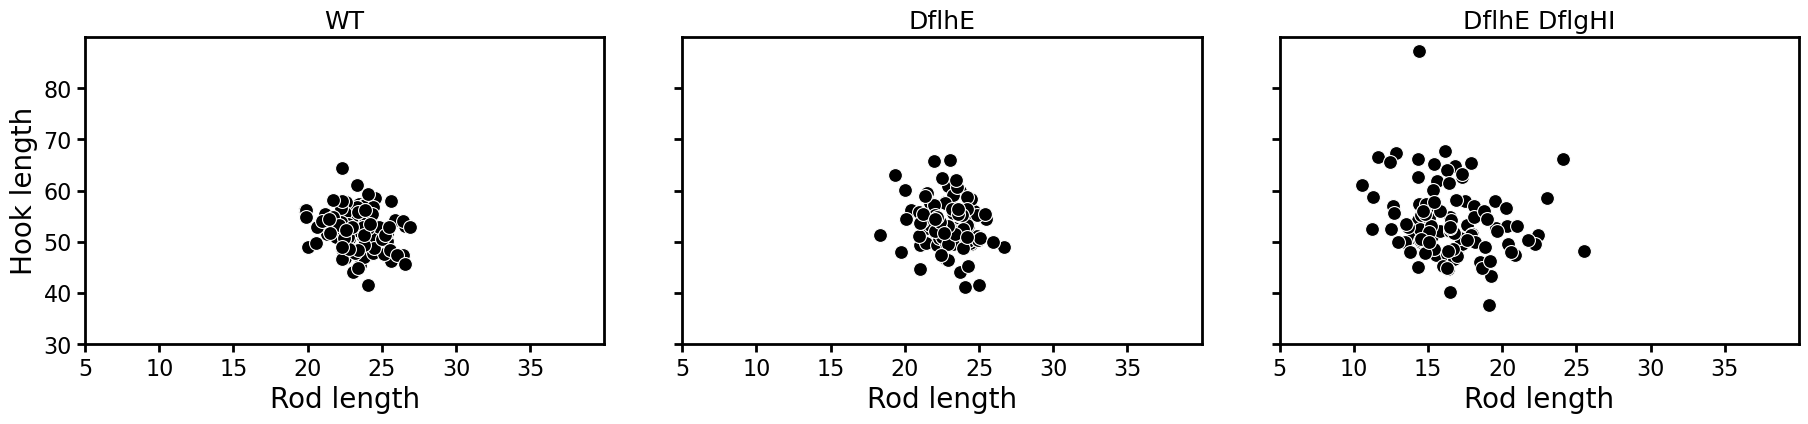

In [13]:
# Define the order of categories for the FacetGrid
category_order = ['WT', 'DflhE','DflhE DflgHI']
custom_titles = ['WT', 'DflhE','DflhE DflgHI']
# Create a FacetGrid with a separate subplot for each unique IMAGE
g = sns.FacetGrid(df, col='Sample', col_wrap=3, aspect=1.5, height=4, col_order=category_order)
g.map_dataframe(sns.scatterplot, x='Length rod', y='Length hook', color='black', s=100)

g.despine(top=False, right=False)  # Removes top and right spines for each facet


# Loop through the axes to set the spines, ticks, and custom titles
for i, ax in enumerate(g.axes.flat):
    # Set custom title
    ax.set_title(custom_titles[i], fontsize=18)  

for ax in g.axes.flat:
    ax.set_xlabel('Rod length', fontsize=20)  # Change x-axis label
    ax.set_ylabel('Hook length', fontsize=20)  # Change y-axis label

    ax.xaxis.set_tick_params(labelsize=16)  # Change x-axis tick size
    ax.yaxis.set_tick_params(labelsize=16)  # Change y-axis tick size
    
    ax.xaxis.set_ticks(np.arange(start=0, stop=40, step=5))  # example of setting ticks from 0 to 10 with step size of 1 on x-axis
    ax.yaxis.set_ticks(np.arange(start=0, stop=90, step=10))  # example of setting ticks from 0 to 10 with step size of 1 on y-axis    
    
    # Change the linewidth of x and y axis
    ax.spines['left'].set_linewidth(2)  
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
  
    # Change the size (width) of the ticks
    for tick in ax.xaxis.get_major_ticks():
        tick._apply_params(tickdir="out", size=6, width=2)
    for tick in ax.yaxis.get_major_ticks():
        tick._apply_params(tickdir="out", size=6, width=2)   
        
# Adjust the layout to add space between subplots
g.fig.subplots_adjust(wspace=0.15, hspace=0.15)

# Add the legend
#g.add_legend(title="Source File")
plt.xlim(5, 40)
plt.ylim(30, 90)
#plt.savefig('RED-MitoT.png', bbox_inches='tight')
# Show the plot
plt.show()

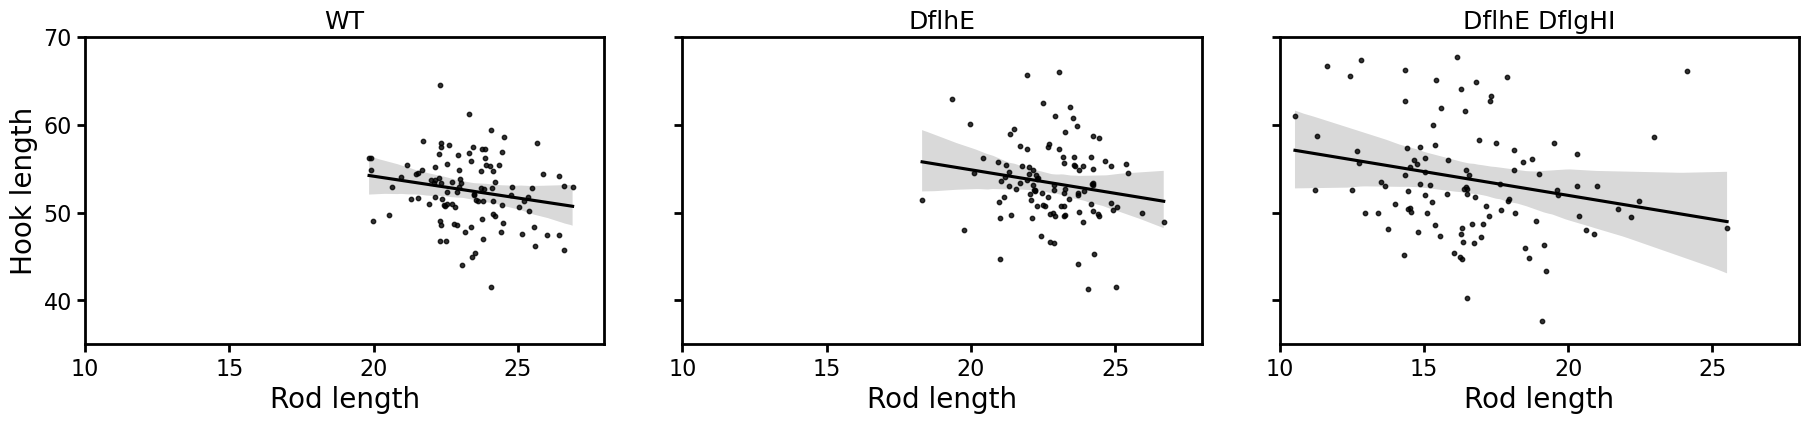

In [14]:
# Define the order of categories for the FacetGrid
category_order = ['WT', 'DflhE','DflhE DflgHI']
custom_titles = ['WT', 'DflhE','DflhE DflgHI']
# Create a FacetGrid with a separate subplot for each unique IMAGE
g = sns.FacetGrid(df, col='Sample', col_wrap=3, aspect=1.5, height=4, col_order=category_order)
#g.map_dataframe(sns.scatterplot, x='Length rod', y='Length Hook', color='black', size=4)

g.map_dataframe(sns.regplot, x='Length rod', y='Length hook',
                scatter_kws={"color": "black", "s":10}, line_kws={"color": "black"},ci=99, fit_reg=True)


g.despine(top=False, right=False)  # Removes top and right spines for each facet


# Loop through the axes to set the spines, ticks, and custom titles
for i, ax in enumerate(g.axes.flat):
    # Set custom title
    ax.set_title(custom_titles[i], fontsize=18)  

for ax in g.axes.flat:
    ax.set_xlabel('Rod length', fontsize=20)  # Change x-axis label
    ax.set_ylabel('Hook length', fontsize=20)  # Change y-axis label

    ax.xaxis.set_tick_params(labelsize=16)  # Change x-axis tick size
    ax.yaxis.set_tick_params(labelsize=16)  # Change y-axis tick size
    
    ax.xaxis.set_ticks(np.arange(start=0, stop=40, step=5))  # example of setting ticks from 0 to 10 with step size of 1 on x-axis
    ax.yaxis.set_ticks(np.arange(start=0, stop=90, step=10))  # example of setting ticks from 0 to 10 with step size of 1 on y-axis    
    
    # Change the linewidth of x and y axis
    ax.spines['left'].set_linewidth(2)  
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
  
    # Change the size (width) of the ticks
    for tick in ax.xaxis.get_major_ticks():
        tick._apply_params(tickdir="out", size=6, width=2)
    for tick in ax.yaxis.get_major_ticks():
        tick._apply_params(tickdir="out", size=6, width=2)   
        
# Adjust the layout to add space between subplots
g.fig.subplots_adjust(wspace=0.15, hspace=0.15)

# Add the legend
#g.add_legend(title="Source File")
plt.xlim(10, 28)
plt.ylim(35, 70)
#plt.savefig('Relative Hook_Rod length.tiff', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

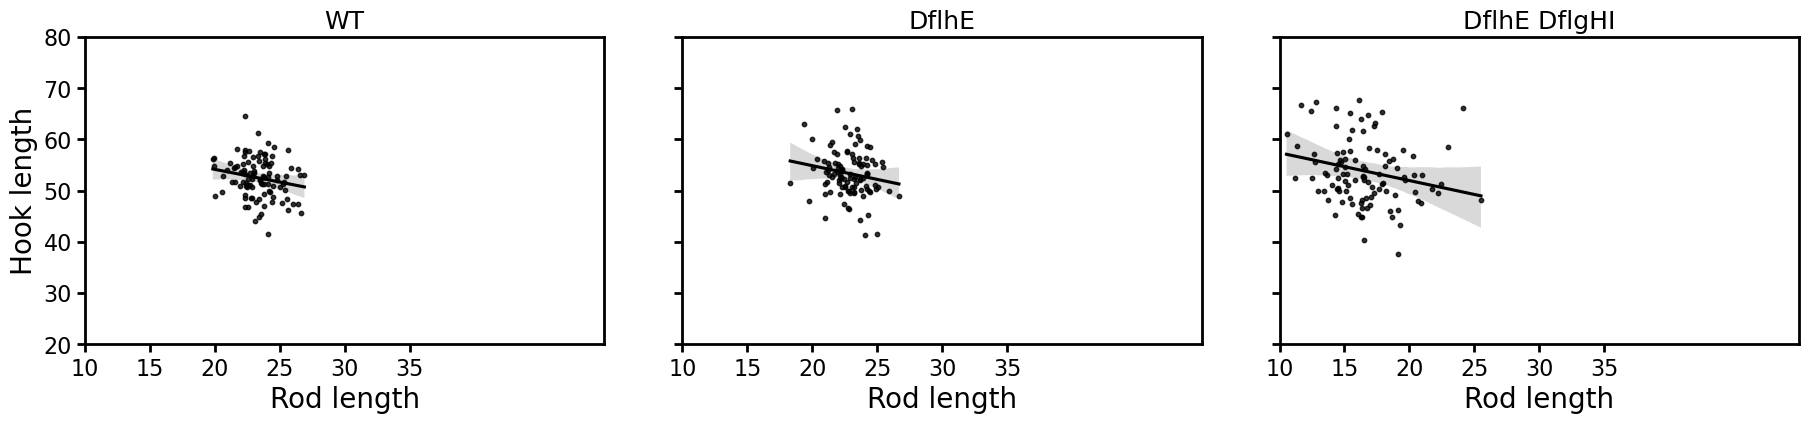

In [15]:
category_order = ['WT', 'DflhE','DflhE DflgHI']
custom_titles = ['WT', 'DflhE','DflhE DflgHI']
# Create a FacetGrid with a separate subplot for each unique IMAGE
g = sns.FacetGrid(df, col='Sample', col_wrap=3, aspect=1.5, height=4, col_order=category_order)
#g.map_dataframe(sns.scatterplot, x='Length rod', y='Length Hook', color='black', size=4)

g.map_dataframe(sns.regplot, x='Length rod', y='Length hook',
                scatter_kws={"color": "black", "s":10}, line_kws={"color": "black"},ci=99, fit_reg=True)


g.despine(top=False, right=False)  # Removes top and right spines for each facet


# Loop through the axes to set the spines, ticks, and custom titles
for i, ax in enumerate(g.axes.flat):
    # Set custom title
    ax.set_title(custom_titles[i], fontsize=18)  

for ax in g.axes.flat:
    ax.set_xlabel('Rod length', fontsize=20)  # Change x-axis label
    ax.set_ylabel('Hook length', fontsize=20)  # Change y-axis label

    ax.xaxis.set_tick_params(labelsize=16)  # Change x-axis tick size
    ax.yaxis.set_tick_params(labelsize=16)  # Change y-axis tick size
    
    ax.xaxis.set_ticks(np.arange(start=0, stop=40, step=5))  # example of setting ticks from 0 to 10 with step size of 1 on x-axis
    ax.yaxis.set_ticks(np.arange(start=0, stop=90, step=10))  # example of setting ticks from 0 to 10 with step size of 1 on y-axis    
    
    # Change the linewidth of x and y axis
    ax.spines['left'].set_linewidth(2)  
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
  
    # Change the size (width) of the ticks
    for tick in ax.xaxis.get_major_ticks():
        tick._apply_params(tickdir="out", size=6, width=2)
    for tick in ax.yaxis.get_major_ticks():
        tick._apply_params(tickdir="out", size=6, width=2)   
        
# Adjust the layout to add space between subplots
g.fig.subplots_adjust(wspace=0.15, hspace=0.15)

# Add the legend
#g.add_legend(title="Source File")
plt.xlim(10, 50)
plt.ylim(20, 80)
#plt.savefig('Relative Hook_Rod length.tiff', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

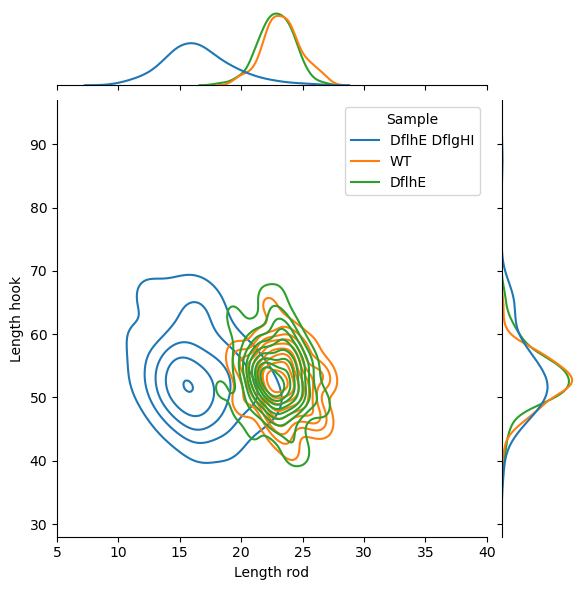

In [16]:
# Create the jointplot
g = sns.jointplot(x='Length rod', y='Length hook', data=df, hue="Sample", kind="kde")

# Your custom titles
custom_titles = ['DflhE DflgHI', 'WT', 'DflhE']

# Get the legend
leg = g.ax_joint.get_legend()

# Update the text of each legend item
for text, label in zip(leg.texts, custom_titles):
    text.set_text(label)

# Set limits for x-axis
plt.xlim(5,40)
#plt.savefig('Relative Hook_Rod length_Map.tiff', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

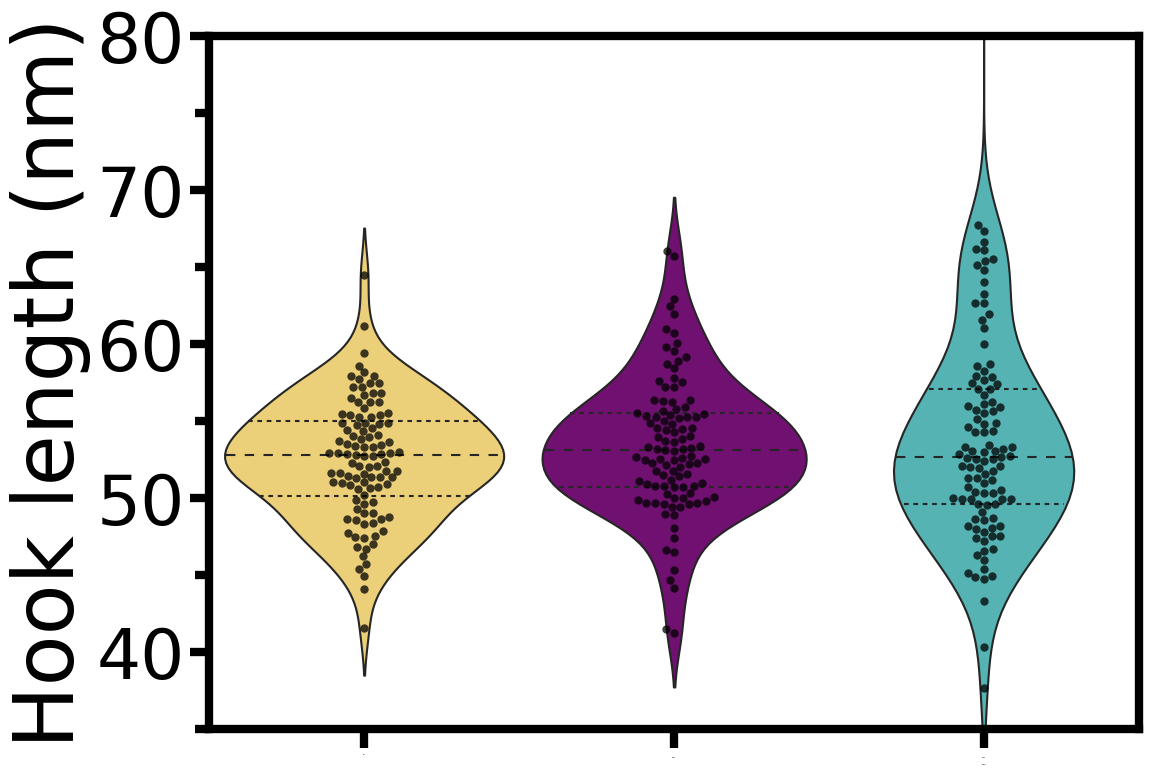

In [89]:
import matplotlib.ticker as mticker
# Set the figure size here
plt.figure(figsize=(12, 9))  # Adjust (width, height) as needed for your plots

# Create the jointplot
custom_order = ['WT', 'DflhE', 'DflhE DflgHI']
custom_titles = ['WT', r'$\mathit{ΔflhE}$', r'$\mathit{ΔflhE}$'+ '\n' +r'$\mathit{ΔflgHI}$']
palette = ['#ffd966', '#800080', '#47c3c3']  # Replace with your desired colors
g = sns.violinplot(x='Sample', y='Length hook', data=df, kind="kde", palette=palette,
                  width=0.9, order=custom_order, inner="quart")
#inner_kws=dict(box_width=15, whis_width=2, color=".8"))
sns.swarmplot(x='Sample', y='Length hook', data=df, color="black", s=6, alpha=.75,
             order=custom_order)
# Set limits for x-axis
plt.ylim(35,80)
plt.ylabel('Hook length (nm)', fontsize=60)
plt.xlabel('')

plt.xticks(range(len(custom_order)), custom_titles, size=0)

# Increase the width of the axes and frame
for spine in plt.gca().spines.values():
    spine.set_linewidth(6)  # Adjust the width as needed

# Add minor ticks on y-axis without labels and adjust tick lengths and widths
plt.gca().yaxis.set_minor_locator(mticker.MultipleLocator(5))
plt.tick_params(axis='y', which='minor', length=10, width=6)  # Adjust width and length of minor ticks
plt.tick_params(axis='y', which='major', length=14, width=6)  # Adjust width and length of major ticks
plt.tick_params(axis='x', which='major', length=14, width=6)  
# Set specific y-axis labels
plt.yticks([40, 50, 60, 70, 80], size=50)

plt.savefig('Hook length_violin.tiff', dpi=300, bbox_inches='tight')
#plt.savefig('Hook length_violin.png', dpi=300, bbox_inches='tight')
plt.show()

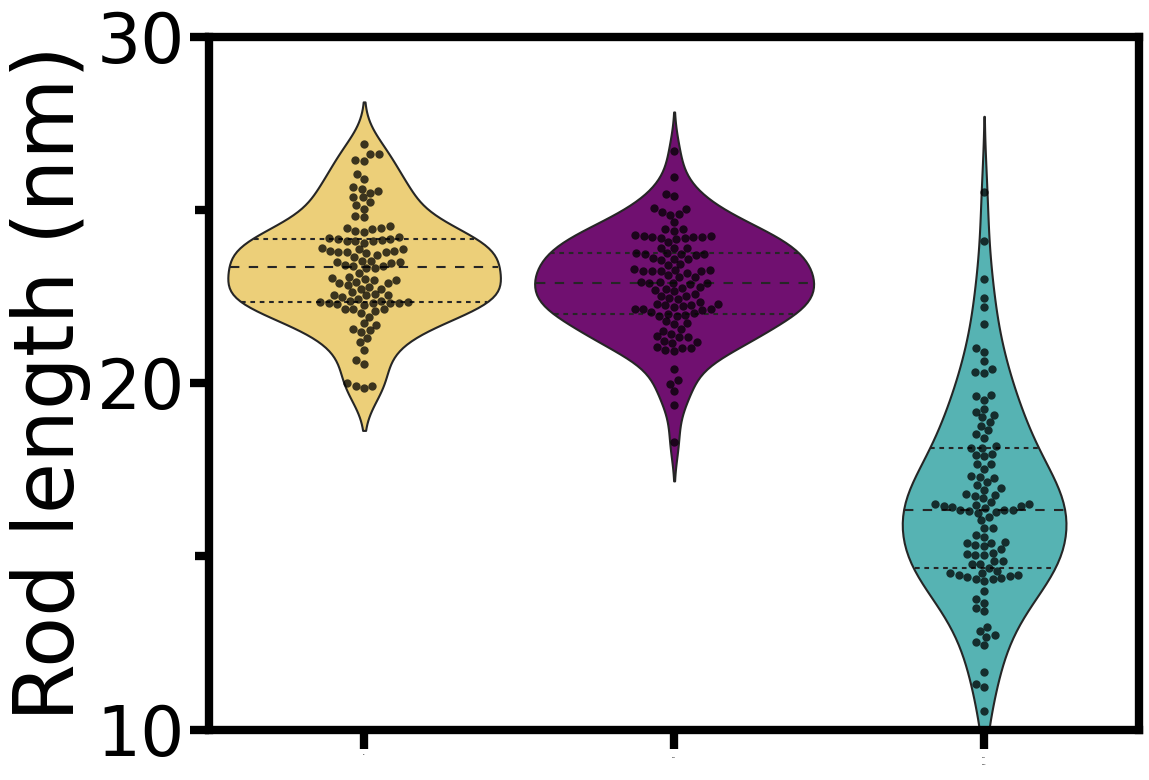

In [90]:
plt.figure(figsize=(12,9))  # Adjust (width, height) as needed for your plots
custom_order = ['WT', 'DflhE', 'DflhE DflgHI']
custom_titles = ['WT', r'$\mathit{ΔflhE}$', r'$\mathit{ΔflhE}$'+ '\n' +r'$\mathit{ΔflgHI}$']

# Create the jointplot
palette = ['#ffd966', '#800080', '#47c3c3']  # Replace with your desired colors
g = sns.violinplot(x='Sample', y='Length rod', data=df, kind="kde", palette=palette,
                  width=0.9, order=custom_order, inner="quart")
sns.swarmplot(x='Sample', y='Length rod', data=df, color="black",  s=6, alpha=.75,
             order=custom_order)
# Set limits for x-axis
plt.ylim(10,30)
plt.ylabel('Rod length (nm)', fontsize=60)
plt.xlabel('')
plt.xticks(range(len(custom_order)), custom_titles, size=0)

# Increase the width of the axes and frame
for spine in plt.gca().spines.values():
    spine.set_linewidth(6)  # Adjust the width as needed

# Add minor ticks on y-axis without labels and adjust tick lengths and widths
plt.gca().yaxis.set_minor_locator(mticker.MultipleLocator(5))
plt.tick_params(axis='y', which='minor', length=10, width=6)  # Adjust width and length of minor ticks
plt.tick_params(axis='y', which='major', length=14, width=6)  # Adjust width and length of major ticks
plt.tick_params(axis='x', which='major', length=14, width=6)  
# Set specific y-axis labels
plt.yticks([10, 20, 30], size=50)

plt.savefig('Rod length_violin.tiff', dpi=300, bbox_inches='tight')
plt.show()

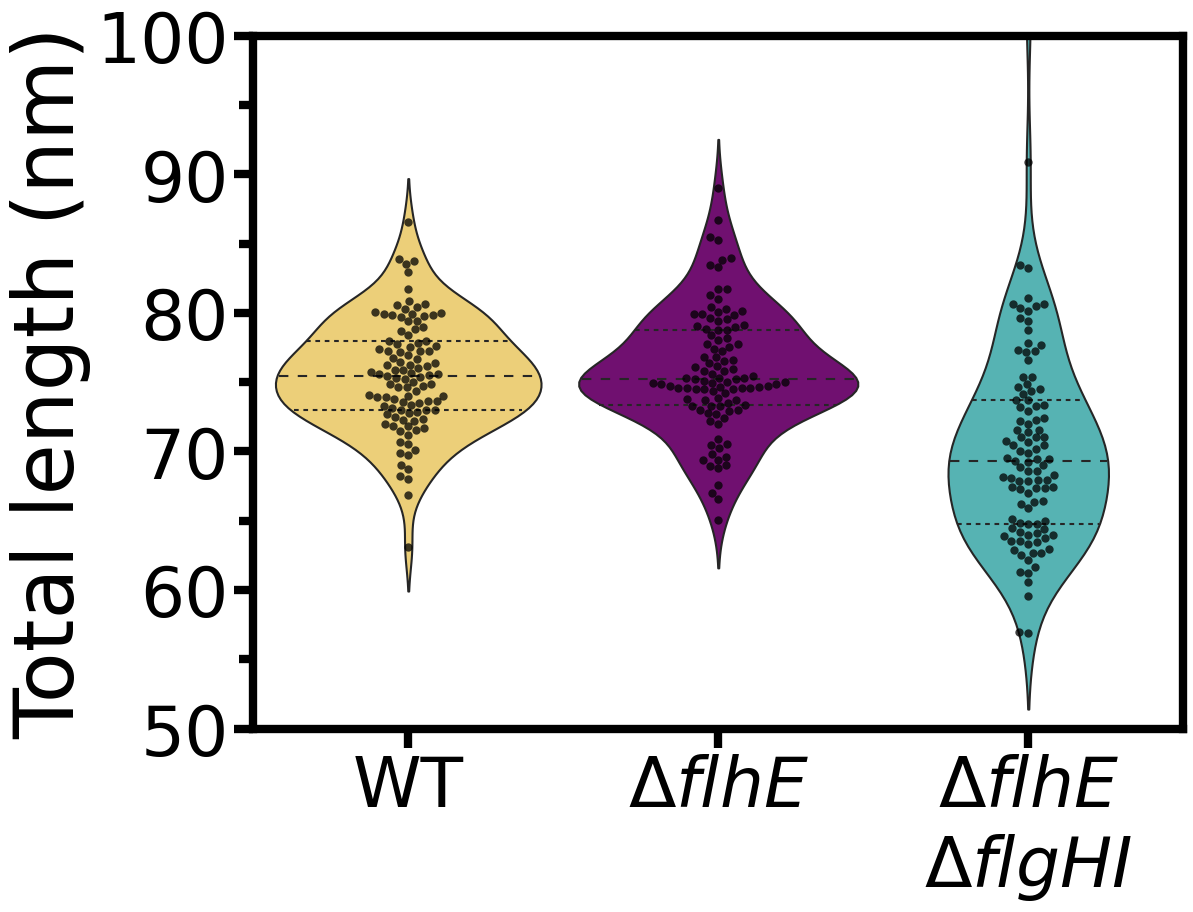

In [91]:
plt.figure(figsize=(12, 9))  # Adjust (width, height) as needed for your plots
# Create the jointplot
custom_order = ['WT', 'DflhE', 'DflhE DflgHI']
custom_titles = ['WT', r'$\mathit{ΔflhE}$', r'$\mathit{ΔflhE}$'+ '\n' +r'$\mathit{ΔflgHI}$']
palette = ['#ffd966', '#800080', '#47c3c3']  # Replace with your desired colors
g = sns.violinplot(x='Sample', y='Length total', data=df, kind="kde", palette=palette,
                  width=0.9, order=custom_order, inner="quart")
sns.swarmplot(x='Sample', y='Length total', data=df, color="black", s=6, alpha=.75,
             order=custom_order)
# Set limits for x-axis
plt.ylim(50,100)
plt.ylabel('Total length (nm)', fontsize=60)
plt.xlabel('')
plt.xticks(range(len(custom_order)), custom_titles, size=50)

# Increase the width of the axes and frame
for spine in plt.gca().spines.values():
    spine.set_linewidth(6)  # Adjust the width as needed

# Add minor ticks on y-axis without labels and adjust tick lengths and widths
plt.gca().yaxis.set_minor_locator(mticker.MultipleLocator(5))
plt.tick_params(axis='y', which='minor', length=10, width=6)  # Adjust width and length of minor ticks
plt.tick_params(axis='y', which='major', length=14, width=6)  # Adjust width and length of major ticks
plt.tick_params(axis='x', which='major', length=14, width=6)   
# Set specific y-axis labels
plt.yticks([50,60,70,80,90,100], size=50)

plt.savefig('Total Length_violin.tiff', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\halteman\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


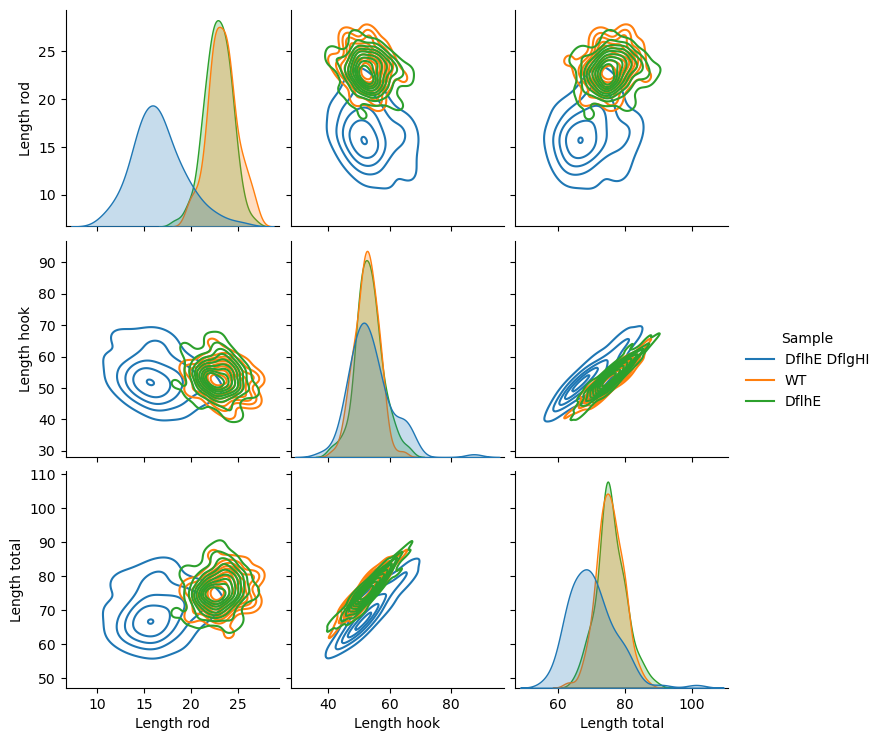

In [65]:
sns.pairplot(data=df,
             vars=['Length rod', 'Length hook', 'Length total'], 
             hue='Sample',
             kind='kde')
plt.savefig('Relative Hook_Rod length_Map.tiff', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\halteman\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


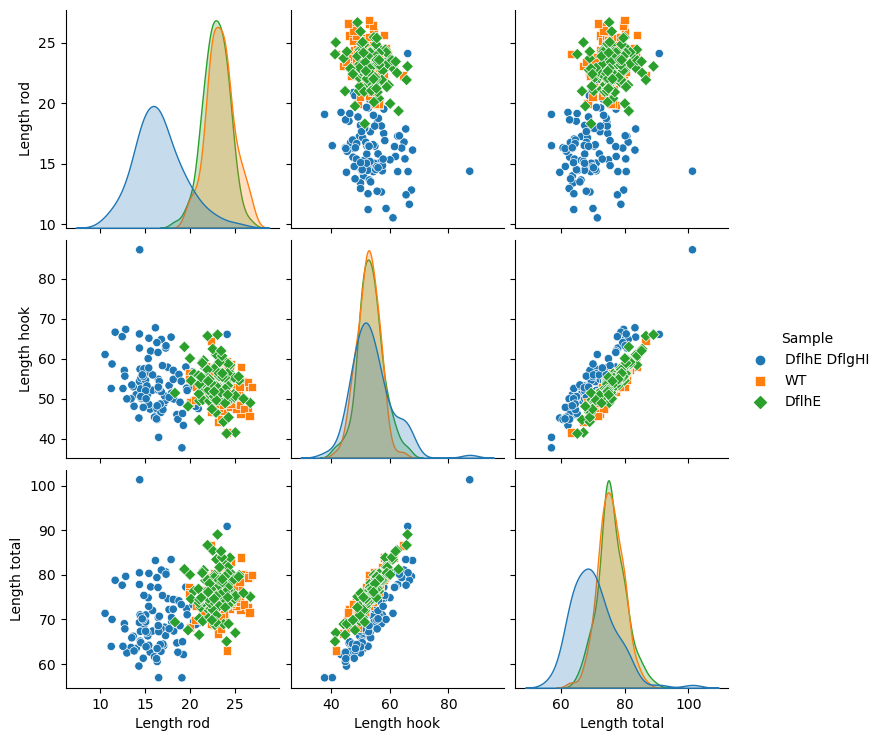

In [66]:
sns.pairplot(data=df,
             vars=['Length rod', 'Length hook', 'Length total'], 
             hue='Sample',
             markers=["o", "s", "D"])
#plt.savefig('Relative Hook_Rod length_Map.tiff', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\halteman\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


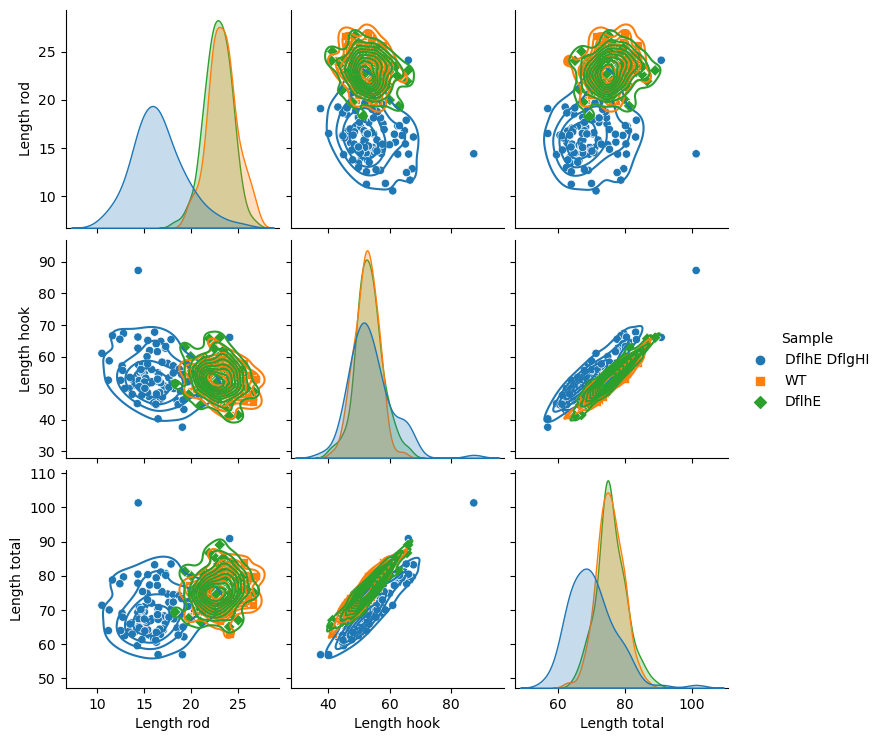

In [15]:
g = sns.pairplot(data=df,
                 vars=['Length rod', 'Length hook', 'Length total'], 
                 hue='Sample',
                 markers=["o", "s", "D"],
                 diag_kind="kde")
g.map_lower(sns.kdeplot, color="1")
g.map_upper(sns.kdeplot, color=".1")